# Machine Learning to predict risk of crimes based on the location, time and presence of trees

In [24]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt


In [25]:
# Importing the dataset from parquet file
trees_crimes_people_df = pd.read_parquet('../data/matched_data.parquet')
trees_crimes_people_df.head()

,Longitude,Latitude,hour_of_day,day_of_week,F,M,fair_tree_count,good_tree_count,poor_tree_count
0,-74.25,40.5004,0,0,0.0,0.0,0,0,0
1,-74.25,40.5004,0,1,0.0,0.0,0,0,0
2,-74.25,40.5004,0,2,0.0,0.0,0,0,0
3,-74.25,40.5004,0,3,0.0,0.0,0,0,0
4,-74.25,40.5004,0,4,0.0,0.0,0,0,0


# Dividing the dataset into the feature matrix and the target vector

In [26]:
# Slide the dataframe and move colums 4 and 5 to df Y. Keep the rest in df X
Y = trees_crimes_people_df.iloc[:, 4:5]

X = trees_crimes_people_df.iloc[:,[0,1,2,3,6,7,8]]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1337)

# Baseline: Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("MAE: ", mean_absolute_error(Y_test, Y_pred))
print("MAPE: ", mean_absolute_percentage_error(Y_test, Y_pred))

MSE:  6.458328176495186e-08
MAE:  0.00010313895539546784
MAPE:  234900752643.24362


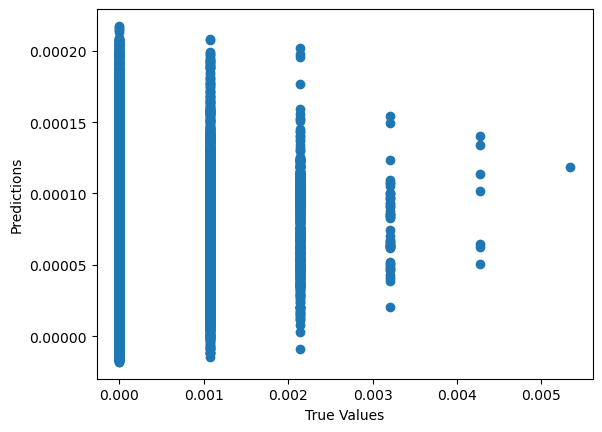

In [29]:
# plot the linear regression model using matplotlib
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


# Test different regression models

In [30]:
from sklearn.linear_model import Perceptron, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# Convert Y_train and Y_test to 1D array
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

names = [
    "Lasso",
    "Elastic Net",
    "Linear SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Neural Net",
    "K-Nearest Neighbours"
]

regressors = [
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    SVR(kernel="linear", C=0.025),
    DecisionTreeRegressor(max_depth=5),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostRegressor(),
    MLPRegressor(alpha=1, max_iter=1000),
    KNeighborsRegressor(3),
]

In [32]:
categorical_technique_list = ["Just one"]
X_train_list = [X_train]
X_test_list = [X_test]

# Create a dictionary to store the dataframes of the results for each method
results_dict = {}

MSE_per_dataset_df = pd.DataFrame(columns=["Dataset Name"].append(names))
MAE_per_dataset_df = pd.DataFrame(columns=["Dataset Name"].append(names))
MAPE_per_dataset_df = pd.DataFrame(columns=["Dataset Name"].append(names))

for technique,X_train,X_test in zip(categorical_technique_list,X_train_list,X_test_list):
    print("[INFO] - Categorical technique: ", technique)
    MSE_line = {"Dataset Name": technique}
    MAE_line = {"Dataset Name": technique}
    MAPE_line = {"Dataset Name": technique}

    for regressor,method_name in zip(regressors,names):
        print("[INFO] - Regressor: ", method_name)
        regressor.fit(X_train, Y_train)
        Y_pred = regressor.predict(X_test)
        # create a dataframe with the Y_test and Y_pred
        Y_test_Y_pred_df = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})
        # append the dataframe to the dictionary
        results_dict[method_name] = Y_test_Y_pred_df
        # calculate the MSE, MAE and MAPE
        MSE_line[method_name] = mean_squared_error(Y_test, Y_pred)
        MAE_line[method_name] = mean_absolute_error(Y_test, Y_pred)
        MAPE_line[method_name] = mean_absolute_percentage_error(Y_test, Y_pred)


    # using pandas concat to append the new line to the dataframe
    MSE_per_dataset_df = pd.concat([MSE_per_dataset_df, pd.DataFrame([MSE_line])], ignore_index=True)
    MAE_per_dataset_df = pd.concat([MAE_per_dataset_df, pd.DataFrame([MAE_line])], ignore_index=True)
    MAPE_per_dataset_df = pd.concat([MAPE_per_dataset_df, pd.DataFrame([MAPE_line])], ignore_index=True)


[INFO] - Categorical technique:  Just one
[INFO] - Regressor:  Lasso
[INFO] - Regressor:  Elastic Net
[INFO] - Regressor:  Linear SVM


C:\Users\Kaninik\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[INFO] - Regressor:  Decision Tree
[INFO] - Regressor:  Random Forest


C:\Users\Kaninik\AppData\Local\Temp\ipykernel_14304\136872568.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, Y_train)


[INFO] - Regressor:  AdaBoost


C:\Users\Kaninik\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[INFO] - Regressor:  Neural Net


C:\Users\Kaninik\anaconda3\envs\geo_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[INFO] - Regressor:  K-Nearest Neighbours


In [42]:
MSE_per_dataset_df
# unpivot the dataframe
MSE_per_dataset_df = MSE_per_dataset_df.melt(id_vars=['Dataset Name'], var_name='Method', value_name='MSE')

In [41]:
MAE_per_dataset_df
# unpivot the dataframe

,Dataset Name,Method,MAE
0,Just one,Lasso,0.000104
1,Just one,Elastic Net,0.000104
2,Just one,Linear SVM,0.002617
3,Just one,Decision Tree,0.000100
4,Just one,Random Forest,0.000103
5,Just one,AdaBoost,0.000242
6,Just one,Neural Net,0.000137
7,Just one,K-Nearest Neighbours,0.000097


In [40]:
MAE_per_dataset_df = MAE_per_dataset_df.melt(id_vars=['Dataset Name'], var_name='Method', value_name='MAE')
MAE_per_dataset_df

ValueError: value_name (MAE) cannot match an element in the DataFrame columns.

In [35]:
MAPE_per_dataset_df

,Dataset Name,Lasso,Elastic Net,Linear SVM,Decision Tree,Random Forest,AdaBoost,Neural Net,K-Nearest Neighbours
0,Just one,2.370828e+11,2.370828e+11,1.146601e+13,2.269073e+11,2.338765e+11,9.185216e+11,3.913460e+11,2.215423e+11


In [44]:
# For plot the MSE, MAE and MAPE in a bar chart for each method
alt.Chart(MSE_per_dataset_df).mark_bar().encode(
    x='Method',
    y='MSE',
).properties(
    width=300,
    height=300
)



alt.Chart(...)